# <center> Unidad 7: Web Scraping</center>

## Introducción
En esta lección revisaremos el proceso de **Web Scraping**. El **Web Scraping**, también conocido como raspado de páginas web, es un proceso automatizado que permite extraer información de páginas web y almacenarla en un formato estructurado para su posterior análisis. Esta técnica se utiliza comúnmente para recopilar grandes cantidades de datos de manera eficiente y automatizada, y se utiliza en diversas aplicaciones como la monitorización de precios, análisis de mercado, investigación de la competencia, entre otras.

Básicamente, el web scraping implica el uso de software programado, como bots, crawlers o spiders, para rastrear uno o varios sitios web y extraer automáticamente la información, los contenidos y otros datos que contienen. El proceso es comparable al copiado y pegado, pero se realiza de manera automatizada y a gran escala.La mayoría de los datos extraídos mediante el web scraping son no estructurados, es decir, en formato HTML, y necesitan ser transformados en datos estructurados para su uso posterior en aplicaciones. Esto se puede lograr mediante la conversión de los datos extraídos en una hoja de cálculo o una base de datos, permitiendo así el análisis y la toma de decisiones basada en datos.

Entre las aplicaciones más comunes del web scraping se encuentra la monitorización de precios en línea, que utiliza bots para extraer información sobre precios de diferentes sitios web, permitiendo así a las empresas comparar precios y ofrecer productos y servicios competitivos. Otras aplicaciones incluyen la investigación de la competencia, análisis de mercado, detección de fraudes, entre otras.

En resumen, el web scraping es una técnica automatizada para la recopilación de datos de sitios web, que se utiliza comúnmente en diversas aplicaciones comerciales y de investigación. Permite la extracción de grandes cantidades de información de manera eficiente y automatizada, lo que lo hace especialmente útil para la toma de decisiones basada en datos.






# Caso práctico

Este material expande el marco inicial de las técnicas de web scraping y aborda la temática en un contexto del análisis y resolución de un caso práctico de análisis de sentimientos con Python. Tiene por objetivo analizar la aplicabilidad de los métodos de web scraping para el análisis de sentimientos usando como referencia las 9 etapas del ciclo de vida del Big Data.

**Que revisaremos?**
* Cómo usar web scraping para obtener reseñas de películas de IMDB
* Cómo limpiar los datos
* Qué es el Análisis de Sentimientos
* Cómo usar técnicas de procesamiento del lenguaje natural (NLP)

💡 _**Nota**_: _Este material ha sido preparado por la **Universidad de las Américas - UDLA**. Parte del contenido ha sido adaptado a partir de material público liberado en [Kaggle](kaggle.com), [Datacamp](datacamp.com) y otros sitios web._

## Sobre la empresa

El siguiente caso de negocio es tomado de **Internet Movie Database (IMDb, en español: Base de datos de películas en Internet)** es una base de datos en línea que en un principio almacena información relacionada con películas, y con el tiempo se transforma en la base de datos más grande del mundo donde se encuentran programas de televisión, eventos en vivo y difundidos en televisión o en la web, entrega de premios y especiales. Se encuentra el personal de equipo de producción (incluyendo directores y productores), actores, series y programas de televisión, videojuegos, actores de doblaje y personajes ficticios que aparecen en los medios de entretenimiento visual. Recibe más de 100 millones de usuarios únicos al mes y cuenta con una versión móvil. IMDb fue inaugurada el 17 de octubre de 1985 y en 1998 fue adquirida por [Amazon](https://www.amazon.com).


## 1. Evaluación de necesidades del negocio
La fase de evaluación del caso de negocio requiere que se cree, evalúe y apruebe un caso de negocio antes de proceder a las tareas reales de análisis práctico.


En 1996, **IMDb** se constituyó como empresa en el Reino Unido, con el nombre de The Internet Movie Database Ltd. El fundador, Col Needham, se convirtió en el propietario primario así como en su imagen principal. IMDb se convirtió en un servicio patrocinado y financiado con publicidad. El debut empresarial se acompañó de nuevas secciones y una reescritura y optimización del sitio web.

Los antecedentes de **IMDb** se remontan a 1989, cuando un aficionado publicó una discusión en un grupo de noticias en usenet sobre actrices atractivas. A partir de ese momento, otros usuarios de la lista comenzaron a recopilar actores y actrices con las películas en las que habían intervenido. La base de datos original fue construida a partir de las listas de créditos que Col Needham y otros dos lectores, Dave Knight y Andy Krieg, habían comenzado a publicar en el grupo. Needham publicó en septiembre de 1991 la primera herramienta simple (una serie de shell scripts de Unix) que permitía la consulta de las listas existentes en ese momento: la lista de directores, la de actores, la de actrices y la de actores fallecidos. La fusión de las cuatro la base de datos resultante se convertiría finalmente en la **IMDb**.


# 3. Adquisición y filtrado de datos
Durante la etapa de adquisición y filtrado de datos se recopilan los datos de todas las fuentes de datos que se identificaron durante la etapa Identificación de datos.
 

**Dataset** 

Este conjunto de datos contiene las reseñas de películas de **IMDb**. Se trata de un conjunto de datos para la clasificación binaria (comentarios positivos y negativos) de sentimientos y contiene alrededor de 4.000 críticas de películas muy populares.

**Diccionario de datos**

* `Movie_ID`: Id de la pelicula.
* `Review`: Reseña película.
* `Rating`: Calificación de la pelicula.

# 4. Extracción de datos
Durante esta etapa se debe extraer datos dispares y transformarlos en un formato que pueda facilitar el análisis de datos.


El "scraper" primero hace clic en el botón para cargar todas las reseñas. Cuando carga todas las reseñas, busca los elementos de reseña y valoración, los almacena en una cadena y la añade a la lista. Más tarde convertimos la lista en un marco de datos y lo guardamos en formato csv.

**Importar librerías y módulos específicos de librerías**

In [1]:
import numpy as np
import pandas as pd

**Cargar el dataset**

In [12]:
url = "https://raw.githubusercontent.com/vhteran/UDLA_Big_Data_aplicada_a_los_Negocios/main/data/get_out_cleaned.csv"
df = pd.read_csv(url, sep = ";")

# 5. Validación y limpieza de datos
Los datos no válidos pueden sesgar y falsear los resultados de los análisis. La etapa de validación y depuración de datos se enfoca en establecer reglas de validación a menudo complejas y a eliminar cualquier dato no válido conocido.


In [8]:
#Visualizamos el dataset
display(df)

,",Movie_ID,Review,Rating,Rate"
0,"1,1,"" interesting movie about an interracial c..."
1,the idea is original and interesting the actin...
2,the movie has its share of racism that cant go...
3,out of found this helpful was this review he...
4,"permalink"",positive,9"
...,...
4205,out of found this helpful was this review he...
4206,"permalink"",positive,6"
4207,"1527,1527,"" i like how different yet compellin..."
4208,out of found this helpful was this review he...


En primer lugar, debemos cambiar el nombre de la columna "Sin nombre: 0" a "Movie_ID".

In [4]:
df.rename(columns={"Unnamed: 0" : "Movie_ID"},inplace=True)


Ahora, dividiremos la columna "Valoración" en "|" y almacenaremos la valoración en una nueva columna llamada "Valoración". Asi, la columna "Valoración" sólo tendrá el puntaje.

In [5]:
df["Rating"] = df["Review"].apply(lambda x: x.split("|")[0])
df["Review"] = df["Review"].apply(lambda x: x.split("|")[1])
print(df.head())

   Movie_ID                                             Review Rating
0         0                                                     8/10 
1         1   Interesting movie about an interracial couple...  9/10 
2         2   I decided to see this film at the theater aft...  5/10 
3         3                                                     9/10 
4         4   Let's clear the air about this film. It's not...  5/10 


Ahora nos centraremos en limpiar las columnas de "Revisión".

In [6]:
df['Review'].replace(" ", np.nan, inplace=True) # replacing space with nan

df.dropna(inplace=True) #drop nan values, coz some of review didn't have actual review
df["Review"] = df["Review"].str.lower() # Converting everything to lower coz "Movie" and "movie" is not the same thing

# Removing special characters from Reviews
spec_chars = ["±","@","#","$","%","^",
                 "&","*","(",")","_","+","=",
                 "-","/",">","<","?",
                 "~","`","'","[","]","|","}",
                 "{",'"', ".",",","!",";"]

for char in spec_chars:
    df["Review"] = df["Review"].str.replace(char, "")

df["Review"].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii')) # getting rid of emojis

df['Review'] = df['Review'].str.replace('\d+', '') # Remove numbers from Reviews

Ha llegado el momento de convertir la columna de críticas en críticas Positivas y Negativas. Nos desharemos de la barra y del número diez. Así, "N/10" queremos guardar la N porque en realidad es la valoración dejada por el usuario. A continuación convertiremos la columna en numérica y utilizaremos el bucle for para convertir las valoraciones menores de 5 en negativas y las mayores o iguales de 5 en positivas.


In [7]:
df["Rate"] = df["Rating"].apply(lambda x: x.split("/")[0])
df["Rate"] = pd.to_numeric(df["Rate"])

for i in range(len(df)):
    if (df["Rate"].iloc[i] < 5):
        df["Rating"].iloc[i] = "negative"
    else:
        df["Rating"].iloc[i] = "positive"
        
df.to_csv("get_out_cleaned.csv")

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# 6. Agregación y representación de datos
La etapa de agregación y representación de datos, se dedica a integrar múltiples conjuntos de datos para obtener una visión unificada.


Este caso de uso no requiere la integración de otros datos.

# 7. Análisis de datos
La etapa de análisis de datos se enfoca en llevar a cabo la tarea de análisis propiamente dicha, que suele implicar uno o más tipos de análisis


# <a id='Sentiment-Analysis' style="color:black">**Análisis de Sentimientos**



El sistema de análisis de sentimientos para el análisis de textos combina técnicas de procesamiento del lenguaje natural (PLN) y de aprendizaje automático para asignar puntuaciones ponderadas de sentimientos a las entidades, temas y categorías de una frase u oración. Utilizar el análisis de sentimientos podría ayudarle a descubrir si los clientes están satisfechos con sus planes de precios, su servicio de atención al cliente, etc.


Importemos las bibliotecas y carguemos el marco de datos limpiado.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from wordcloud import WordCloud, STOPWORDS

df = pd.read_csv('/kaggle/input/movies/get_out_cleaned.csv')
df.drop(columns=["Unnamed: 0"],inplace=True)
print(df.head())

   Movie_ID                                             Review    Rating  Rate
0         1   interesting movie about an interracial couple...  positive     9
1         2   i decided to see this film at the theater aft...  positive     5
2         4   lets clear the air about this film its not a ...  positive     5
3         8   i was totally blown away by get out this is o...  negative     1
4        10   short review if the races were switched as to...  negative     1


 <a id='Tokenization' style="color:black">**Tokenización**

**La tokenización** es el proceso de convertir texto en tokens antes de transformarlo en vectores. También es más fácil filtrar los tokens innecesarios. Por ejemplo, un documento en párrafos o frases en palabras. En este caso estamos tokenizando las reseñas en palabras.

In [9]:
stop_words = set(stopwords.words('english')) # eng stopwords
df['tokenized_reviews'] = df.apply(lambda row: word_tokenize(row['Review']), axis=1) # Tokenization of reviews
df["filtered"] = df['tokenized_reviews'].apply(lambda x: [item for item in x if item not in stop_words]) #Removing stopwrods from tokenized data

<a id='Count-Vectorizer' style="color:black">**Vectorizador de conteo**

El **CountVectorizer** se utiliza para convertir una colección de documentos de texto en un vector de recuentos de términos/tokens.

Por ejemplo words=["movie", "good", "perfect, "good"] se transformaría en: "película" = 1, "bueno" = 2, "perfecto" = 1

In [3]:
df['filtered']=df['filtered'].apply(str)
cv = CountVectorizer(lowercase=False,stop_words='english',binary=True)
cv.fit(df["filtered"])

Inicialicemos nuestra característica y objetivo y hagamos la división de prueba de entrenamiento.

In [11]:
X = cv.transform(df["filtered"])
y = df["Rating"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# 8. Visualización de datos
La capacidad de analizar grandes cantidades de datos y obtener información útil tiene poco valor si los únicos que pueden interpretar los resultados son los analistas.
La etapa de visualización de datos se dedica a utilizar técnicas y herramientas de visualización de datos para comunicar gráficamente los resultados del análisis con vistas a una interpretación eficaz por parte de los usuarios empresariales.

# <a id='KNN' style="color:black">**KNN(K-Nearest-Neighbor)**

K-Nearest-Neighbor es un algoritmo basado en instancia de tipo supervisado de Machine Learning. Puede usarse para clasificar nuevas muestras (valores discretos) o para predecir (regresión, valores continuos). Al ser un método sencillo, es ideal para introducirse en el mundo del  Aprendizaje Automático. Sirve esencialmente para clasificar valores buscando los puntos de datos “más similares” (por cercanía) aprendidos en la etapa de entrenamiento (ver 7 pasos para crear tu ML) y haciendo conjeturas de nuevos puntos basado en esa clasificación.

Es un método que simplemente busca en las observaciones más cercanas a la que se está tratando de predecir y clasifica el punto de interés basado en la mayoría de datos que le rodean.


Elegimos el mejor valor K.

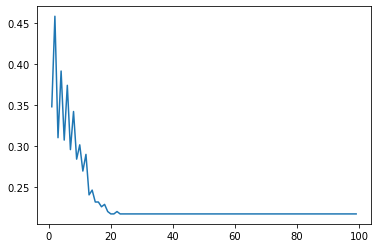

In [13]:
errors = []
for k in range(1,100):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    errors.append(np.mean(pred!=y_test))
plt.plot(range(1,100),errors)
plt.show()

In [14]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
print("K-Nearest Neighbours accuracy score: {}".format(accuracy_score(y_test, knn.predict(X_test))))

K-Nearest Neighbours accuracy score: 0.782608695652174


# <a id='Multinomial-Naive-Bayes' style="color:black">**Naive Bayes Multinomial**

In [15]:
MNB = MultinomialNB()
MNB.fit(X_train,y_train)
print("Multinomial Naive Bayes accuracy score: {}".format(accuracy_score(y_test, MNB.predict(X_test))))

Multinomial Naive Bayes accuracy score: 0.7652173913043478


# <a id='Word-Cloud' style="color:black">**Nube de palabras**

Una nube de palabras es una representación visual de datos textuales. Muestra una lista de palabras, la importancia de cada una se muestra con el tamaño de la fuente o el color.

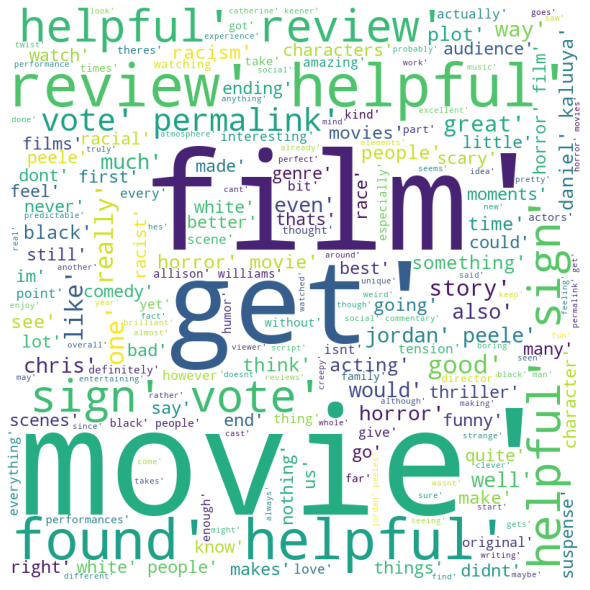

In [17]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(' '.join(df['filtered']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# 9. Utilización de los resultados del análisis
Después de que los resultados del análisis se pongan a disposición de los usuarios de negocio para apoyar la toma de decisiones empresariales, por ejemplo a través de cuadros de mando o paneles, puede haber más oportunidades para utilizar los resultados del análisis. La etapa de utilización de los resultados del análisis, esta enfocada en determinar cómo y dónde se pueden aprovechar más los datos del análisis procesado.


<a id='Conclusion' style="color:black">**Conclusiones**

- Los modelos, con una precisión media del 78% en un conjunto de datos de unos 1.600, demostraron ser mejores. El modelo funcionaría aún mejor en un conjunto de datos mayor.

- Este proyecto puede mejorarse añadiendo XGBoost, ¡y también sería interesante probar TextBlob!
